# ISyE 6416 Homework6 
Name: Chen-Yang(Jim), Liu

School: Georgia Tech

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Problem 1 Bootstrapping

In [2]:
law_school =  {'LSAT': [576, 635, 558, 578, 666, 580, 555, 661, 651, 605, 653, 575, 545, 572, 594],
             'GPA': [3.93, 3.30, 2.81, 3.03, 3.44, 3.07, 3.00, 3.43, 3.36, 3.13, 3.12, 2.74, 2.76, 2.88, 2.96]}
df_law = pd.DataFrame(law_school)

## (a) calculate the correlation coefficient between LSAT and GPA.

In [3]:
np_lsat = df_law['LSAT'].to_numpy()
np_gpa = df_law['GPA'].to_numpy()

In [4]:
np.corrcoef(np_lsat, np_gpa)

array([[1.        , 0.52306627],
       [0.52306627, 1.        ]])

The coefficient between LSAT and GPA is 0.52306627.

## (b) use the nonparametric bootstrapping to estimate the standard deviation and confidence interval of the correlation coefficient. 
Use B = 1000 batches, and each batch consists of N = 15 resamples. For confidence interval, use α = 0.05.

Procedures for Nonparametric Bootstrap
1. Sampling Population is from given 15 data points
2. Resampling data points from sample.
   Randomly sample of size 15 with replacement and create 1000 batches.
3. Construct estimators of standard deviation and confidence interval of the correlation coefficient.
   * Standard Deviation
   * Confidence Interval

In [5]:
from sklearn.utils import resample

B_corref = []
for i in range(1000):
    re_lsat = resample(np_lsat, n_samples=15, replace=True, random_state=i)
    re_gpa = resample(np_gpa, n_samples=15, replace=True, random_state=i)
    B_corref.append(np.corrcoef(re_lsat, re_gpa)[0, 1])

In [6]:
# standard deviation
print("Standard Deviation of Bootstrap resamples:", np.std(B_corref))

Standard Deviation of Bootstrap resamples: 0.26195762048264915


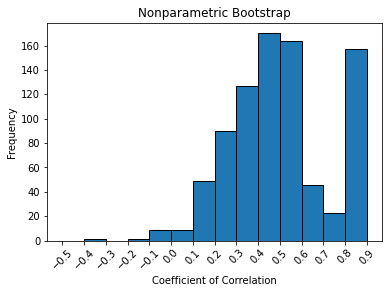

In [7]:
bins= np.arange(-0.5, 1, 0.1)
plt.hist(B_corref, bins=bins, edgecolor="k")
plt.xticks(bins, rotation=45)
plt.ylabel("Frequency")
plt.xlabel("Coefficient of Correlation")
plt.title("Nonparametric Bootstrap")
plt.show()

In [8]:
# get confidence interval 
B_mean = np.mean(B_corref)
B_mean

0.568009667488156

In [9]:
def checkDuplicate(x):
    '''
    x: list
    '''
    set_x = set(x)
    list_set = sorted(set_x)
    return list_set == sorted(x)
print("Is every element unique?: ", checkDuplicate(B_corref))
print("Quantile 25th: ", sorted(B_corref)[24])
print("Quantile 75th: ", sorted(B_corref)[974])

Is every element unique?:  True
Quantile 25th:  0.12170627246527028
Quantile 75th:  0.9556698986795091


In [10]:
No25 = sorted(B_corref)[24]
No975 = sorted(B_corref)[974]
L = 2 * B_mean - No975
U = 2 * B_mean - No25
print("95% Confidence Interval is [{}, {}]".format(L, U))

95% Confidence Interval is [0.18034943629680278, 1.0143130625110417]


## (c) use the parametric bootstrapping to estimate the standard deviation of the correlation coefficient. 
Assume that (LSAT,GPA) has bivariate normal distribution and estimate the five parameters. Then generate 1000 batches of 15 samples from this bivariate normal distribution.

In [11]:
# get bivariate distribution and estimate means of LSAT and GPA, variance of LSAT and GPA, correlation of LSAT and GPA
lsat_mean = np.mean(np_lsat)
gpa_mean = np.mean(np_gpa)
print("Mean of LSAT: {}\nMean of GPA: {}".format(lsat_mean, gpa_mean))
cov = np.cov(np_lsat, np_gpa)
lsat_var = cov[0, 0]
gpa_var = cov[1, 1]
covaroance = cov[0, 1]
print("Variance of LSAT: {}\nVariance of GPA: {}\nCovariance of LSAT and GPA: {}".format(lsat_var, gpa_var, covaroance))

Mean of LSAT: 600.2666666666667
Mean of GPA: 3.130666666666667
Variance of LSAT: 1746.7809523809522
Variance of GPA: 0.10152095238095238
Covariance of LSAT and GPA: 6.96552380952381


In [12]:
# generate 1000 batches of 15 samples 
from scipy.stats import multivariate_normal as mvn
Para_B_corref = np.zeros(1000)
for i in range(len(Para_B_corref)):
    lsat_rv = np.zeros(15)
    gpa_rv = np.zeros(15)
    for j in range(15):
        lsat_rv[j], gpa_rv[j] = mvn.rvs([lsat_mean, gpa_mean], cov)
    Para_B_corref[i] = np.corrcoef(lsat_rv, gpa_rv)[0, 1]

In [13]:
# standard deviation
print("Standard Deviation of Bootstrap resamples:", np.std(Para_B_corref))

Standard Deviation of Bootstrap resamples: 0.21537449812132087


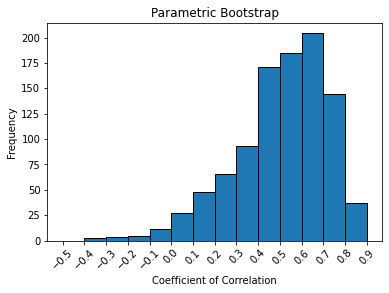

In [14]:
bins= np.arange(-0.5, 1, 0.1)
plt.hist(Para_B_corref, bins=bins, edgecolor="k")
plt.xticks(bins, rotation=45)
plt.ylabel("Frequency")
plt.xlabel("Coefficient of Correlation")
plt.title("Parametric Bootstrap")
plt.show()

In [15]:
# get confidence interval 
Para_B_mean = np.mean(Para_B_corref)
Para_B_mean

0.5081192962826626

In [16]:
print("Is every element unique?: ", checkDuplicate(Para_B_corref))
print("Quantile 25th: ", sorted(Para_B_corref)[24])
print("Quantile 75th: ", sorted(Para_B_corref)[974])

Is every element unique?:  True
Quantile 25th:  0.01556996145954111
Quantile 75th:  0.8172749293504789


In [17]:
Para_No25 = sorted(Para_B_corref)[24]
Para_No975 = sorted(Para_B_corref)[974]
Para_L = 2 * Para_B_mean - Para_No975
Pata_U = 2 * Para_B_mean - Para_No25
print("95% Confidence Interval is [{}, {}]".format(Para_L, Pata_U))

95% Confidence Interval is [0.19896366321484638, 1.0006686311057842]


In [18]:
print("Range of Parametric Bootstrap: ", Pata_U - Para_L)
print("Range of Nonparametrix Bootstrap: ", U - L)

Range of Parametric Bootstrap:  0.8017049678909378
Range of Nonparametrix Bootstrap:  0.8339636262142389


Obviously, Parametric Bootstrap has narrower confindence intervals than Nonparametric one.

# Problem 2 Random forest for email spam classifier

In [19]:
path = '/Users/jim/Dropbox (GaTech)/Courses/ISyE6416/Homework/Homework6/spambase/spambase.names'
f = open(path)
l = f.readlines()
for i in l:
    if i == '|\n' or i == '\n' or i == '\n':
        l.remove(i)
start = l.index("1, 0.    | spam, non-spam classes\n")
l = l[start:]
name = [l[0]]
for i in l[2:]:
    name.append(i)
label = ""
for i in name[0].split()[3:5]:
    label += i +""
    label.rstrip()
features = []
for i in name[1:]:
    i = i.split()[0]
    i = i[:-1]
    features.append(i)
features.append(label)

In [20]:
df_spam = pd.read_table('/Users/jim/Dropbox (GaTech)/Courses/ISyE6416/Homework/Homework6/spambase/spambase.data', sep=',',
                       dtype=float, names=features)

In [21]:
cols = df_spam.columns.tolist()
cols.insert(0,cols[-1])
cols.pop(len(cols)-1)
df_spam = df_spam[cols]

In [22]:
df_spam.head()

,"spam,non-spam",word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,1.0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,...,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61.0,278.0
1,1.0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,...,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101.0,1028.0
2,1.0,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,...,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485.0,2259.0
3,1.0,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,...,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40.0,191.0
4,1.0,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,...,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40.0,191.0


## (a) How many instances of spam versus regular emails are there in the data? How many data points there are? How many features there are?
Note: there may be some missing values, you can just fill in zero.

In [23]:
# fill in missing values
# There are no missing values
print(df_spam.isnull().sum().values == 0)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True]


In [24]:
# Spam vs. Non-Spam
# How many instances of spam versus regular emails are there in the data?
df_spam.iloc[:, 0].value_counts()
print("# of Non Spam Email: ", df_spam.iloc[:, 0].value_counts().values[0])
print("# of Spam Email: ", df_spam.iloc[:, 0].value_counts().values[1])

# of Non Spam Email:  2788
# of Spam Email:  1813


In [25]:
# How many data points are there?
print("Number of data points", df_spam.shape[0])

Number of data points 4601


In [26]:
# How many features there are?
print("Number of features", df_spam.shape[1] - 1)

Number of features 57


## (b) Build a classification tree model (also known as the CART model). 
In R, this can be done using library(rpart). 
In our answer, you should report the tree models fitted similar to what is shown in the “Random forest” lecture, Page 16, the tree plot. 
In R, getting this plot can be done using prp function in library(rpart).

Strategy for Feature Selection: (Reference is from [this](https://scikit-learn.org/stable/modules/feature_selection.html#feature-selection))
1. Original Trees contain too many features which will lead to overfitting. So pruning trees is an important step.
2. Feature Selction: Each tree has feature importance attributes which could be used as feature selection. We use Gini Importance as our criterion to select best model. Gini importance is that we calculate number of datapoints that lies in this category and other datapoints that does not lie in this one. $\Sigma_{k=1}^{K}\hat{p_{mk}}(1-\hat{p_{mk}})$
3. Select Important features based on feature importances and the threshold is 0.05.

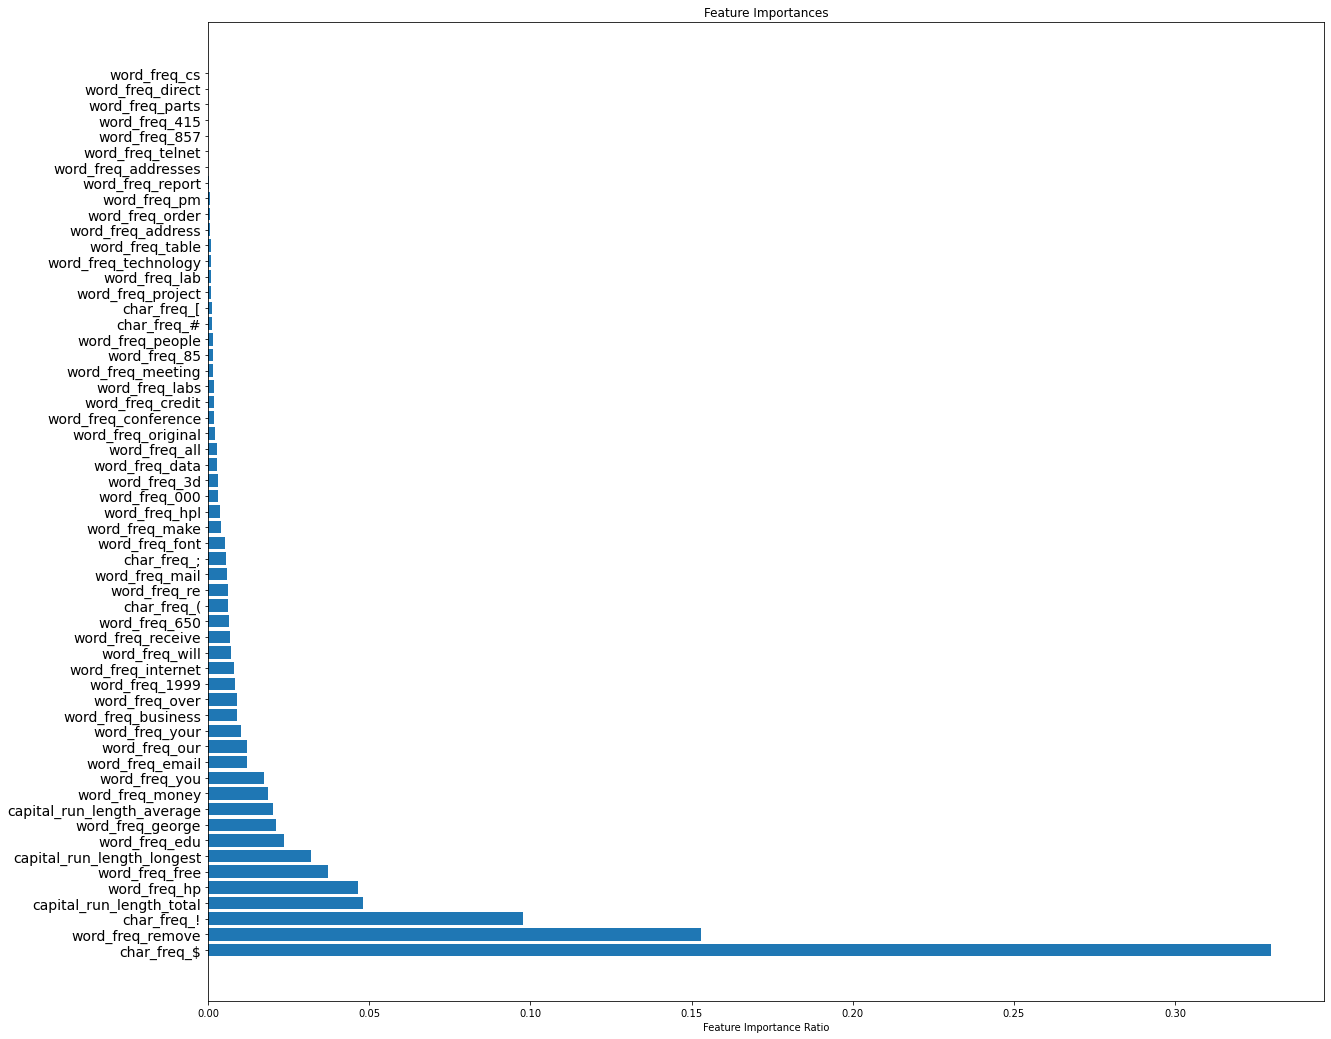

In [27]:
from sklearn import tree
from sklearn.feature_selection import SelectFromModel

X_DT = df_spam.iloc[:, 1:]
y_DT = df_spam['spam,non-spam']
clf_tree = tree.DecisionTreeClassifier()
variables = clf_tree.fit(X_DT, y_DT).feature_importances_

pair = {i:j for i, j in zip(X_DT.columns, variables)}
sort_var = {i: j for i, j in sorted(pair.items(), key=lambda item:item[1], reverse=True)}

plt.figure(figsize=(20, 18))
plt.yticks(fontsize=14)
plt.xlabel("Feature Importance Ratio")
plt.barh(list(sort_var.keys()), list(sort_var.values()))
plt.title("Feature Importances")
plt.show()

In [28]:
clf_selected_tree = tree.DecisionTreeClassifier()
selected_df = X_DT[list(sort_var.keys())[:3]]
clf_selected_tree.fit(selected_df, y_DT).feature_importances_

array([0.48133049, 0.21455574, 0.30411377])

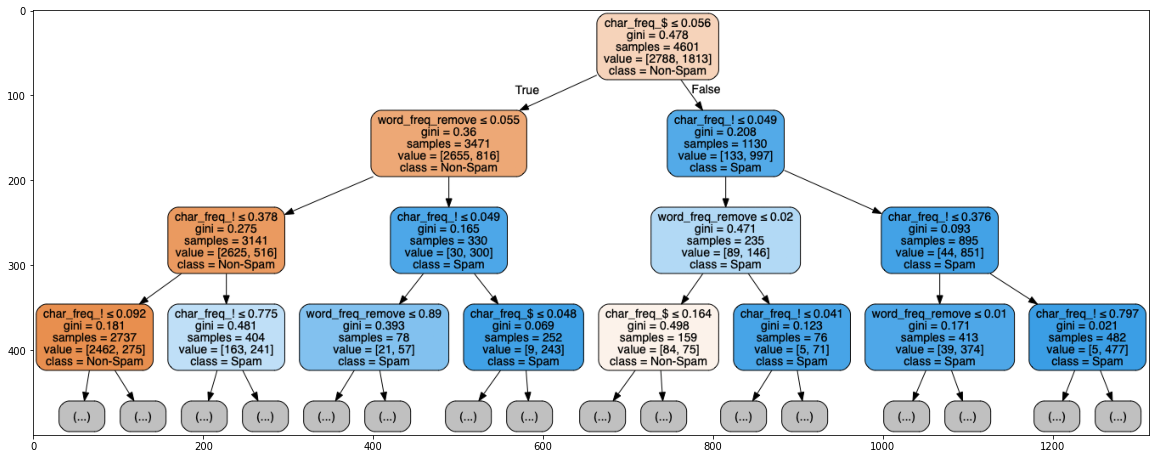

In [58]:
import graphviz 
import pydotplus
from sklearn.externals.six import StringIO
import matplotlib.image as mpimg
import io

dot_data = io.StringIO()
tree.export_graphviz(clf_selected_tree, out_file=dot_data, 
                     feature_names=selected_df.columns,
                     max_depth=3,
                     class_names=['Non-Spam', 'Spam'],  
                     filled=True, rounded=True,  
                     special_characters=True)  
# graph = graphviz.Source(dot_data)  
filename = "tree.png"
pydotplus.graph_from_dot_data(dot_data.getvalue()).write_png(filename)
plt.figure(figsize=(20, 20))
img = mpimg.imread(filename)
imgplot = plt.imshow(img)
plt.show()

## (c) Also build a random forrest model. 
In R, this can be done using library(randomForest).

In [30]:
from sklearn.ensemble import RandomForestClassifier
clf_RF = RandomForestClassifier()
clf_RF.fit(X_DT, y_DT)
clf_RF_dict = {i: j for i, j in zip(X_DT.columns, clf_RF.feature_importances_)}
sorted_clf_RF = sorted(clf_RF_dict.items(), key=lambda item:item[1], reverse=True)
list(sorted_clf_RF)[:5]

[('char_freq_!', 0.12085625139814869),
 ('char_freq_$', 0.08514709866014597),
 ('word_freq_remove', 0.07758456339591059),
 ('word_freq_free', 0.06954105024641355),
 ('capital_run_length_longest', 0.06704106419658461)]

### Revisit: Decision Trees and Random Forest with tuning parameters
Now partition the data to use the first 80% for training and the remaining 20% for testing. Your task is to compare and report the test error for your classification tree and random forest models on testing data, respectively. 

To report your results, please try different tree sizes. Plot the curve of test error versus the number of trees used in random forest, similar to our lecture.

#### (1) Decision Tree

In [31]:
# We will plot missiclassification rate vs. tree size, confusion matrix, tree visualization and ROC curve
# First, whole trees without puning
from sklearn import tree
from sklearn.model_selection import train_test_split
X_DT = df_spam.iloc[:, 1:]
y_DT = df_spam['spam,non-spam']

X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(X_DT, y_DT, test_size=0.20, random_state=2)

clf_tree = tree.DecisionTreeClassifier()
clf_tree = clf_tree.fit(X_train_t, y_train_t)

In [32]:
# get testing errors vs. tree size
ccp_alphas = [i for i in np.arange(0, 1.01, 0.01)]
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train_t, y_train_t)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))
    

Number of nodes in the last tree is: 1 with ccp_alpha: 1.0


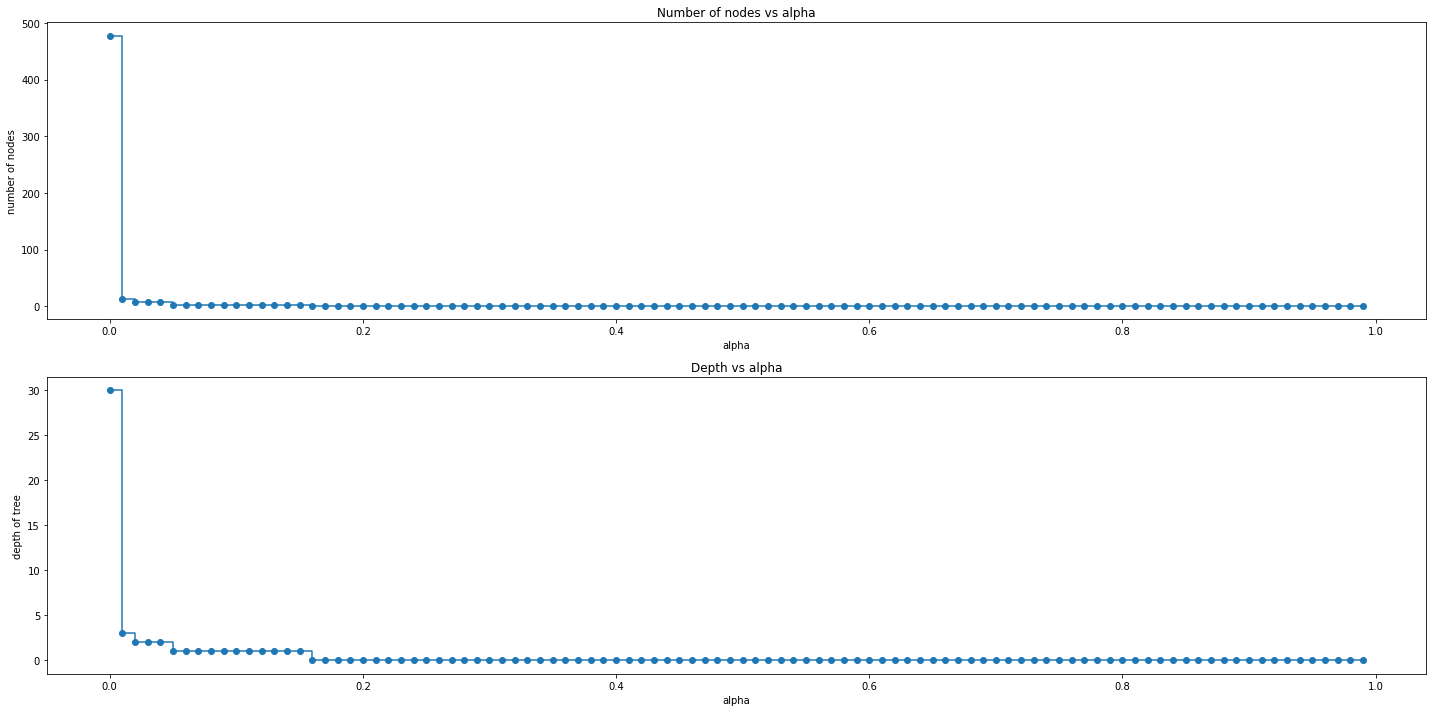

In [33]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]

fig, ax = plt.subplots(2, 1, figsize=(20,10))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()
plt.show()

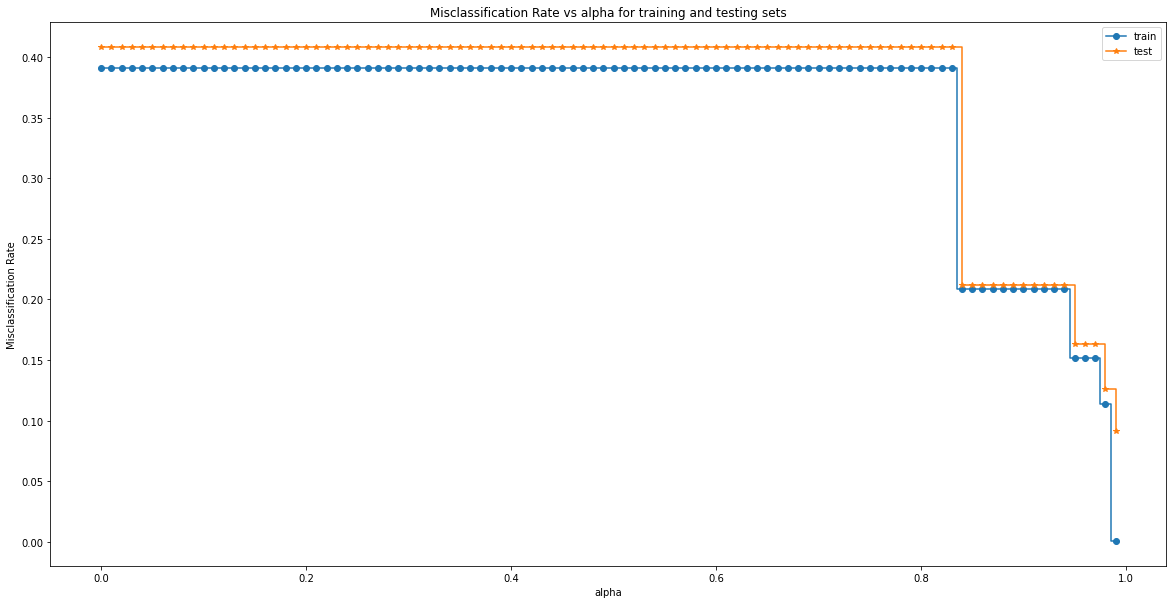

In [34]:
train_scores = sorted([1 - clf.score(X_train_t, y_train_t) for clf in clfs], reverse=True)
test_scores = sorted([1 - clf.score(X_test_t, y_test_t) for clf in clfs], reverse=True)

fig, ax = plt.subplots(figsize=(20,10))
ax.set_xlabel("alpha")
ax.set_ylabel("Misclassification Rate")
ax.set_title("Misclassification Rate vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train",
        drawstyle="steps-mid")
ax.plot(ccp_alphas, test_scores, marker="*", label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

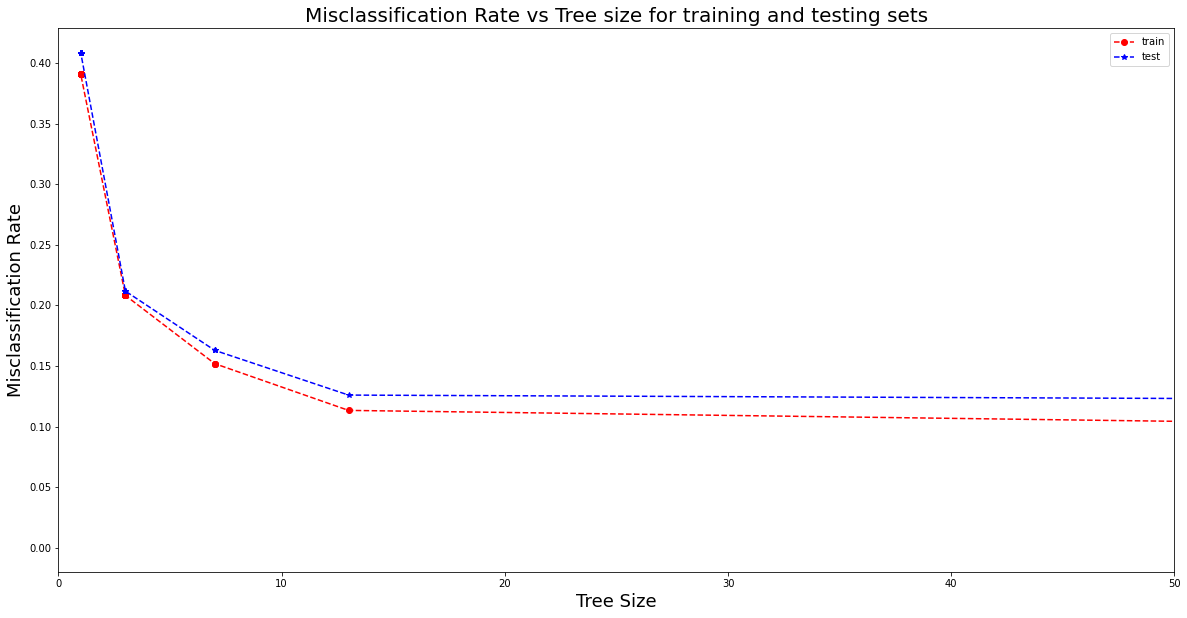

In [35]:
node_counts = [clf.tree_.node_count for clf in clfs]
train_scores = [1 - clf.score(X_train_t, y_train_t) for clf in clfs]
test_scores = [1 - clf.score(X_test_t, y_test_t) for clf in clfs]

fig, ax = plt.subplots(figsize=(20,10))
ax.set_xlabel("Tree Size", fontsize=18)
ax.set_ylabel("Misclassification Rate", fontsize=18)
ax.set_xlim(0, 50)
ax.set_title("Misclassification Rate vs Tree size for training and testing sets", fontsize=20)
ax.plot(node_counts, train_scores, '--r',marker="o", label="train")
ax.plot(node_counts, test_scores, '--b', marker="*", label="test")
ax.legend()
plt.show()

#### (2) Random Forest 

In [36]:
from sklearn.ensemble import RandomForestClassifier

error_rate = []

# Range of `n_estimators` values to explore.
min_estimators = 1
max_estimators = 250

clf = RandomForestClassifier()

for i in range(min_estimators, max_estimators + 1):
    clf.set_params(n_estimators=i)
    clf.fit(X_train_t, y_train_t)

    # Record the OOB error for each `n_estimators=i` setting.
    test_error = 1 - clf.score(X_test_t, y_test_t)
    error_rate.append(test_error)

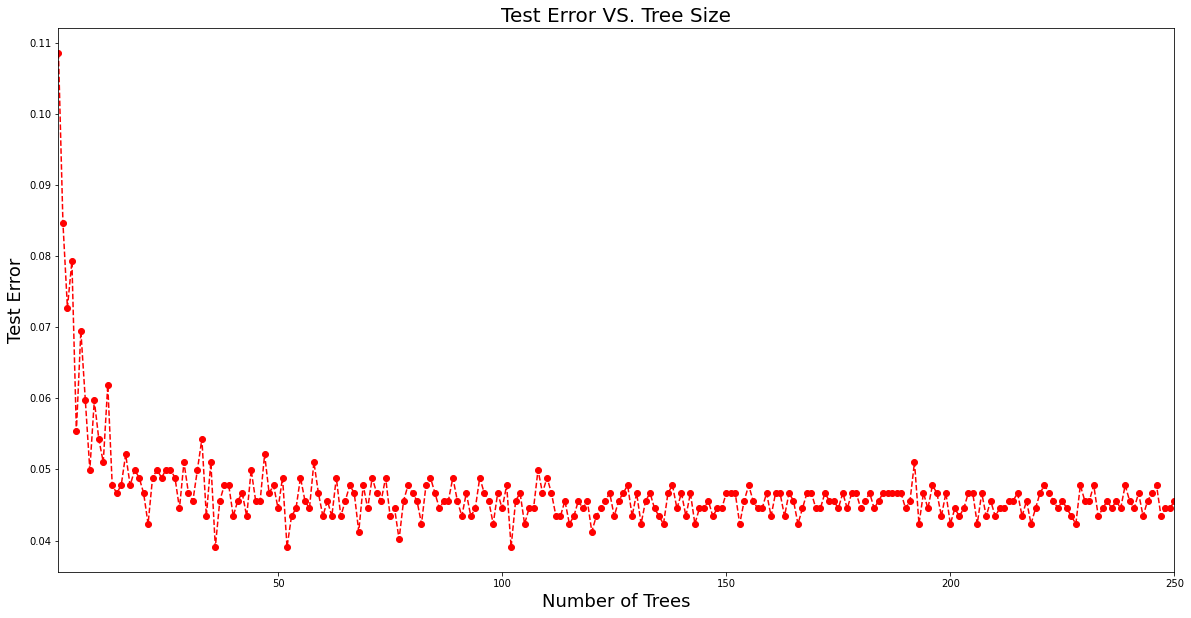

In [37]:
# Generate the "Test error rate" vs. "n_estimators" plot.
treesize = [i for i in range(min_estimators, max_estimators + 1)]
plt.figure(figsize=(20,10))
plt.plot(treesize, error_rate, '--r', marker='o')
plt.xlim(min_estimators, max_estimators)
plt.xlabel("Number of Trees", fontsize=18)
plt.ylabel("Test Error", fontsize=18)
plt.title("Test Error VS. Tree Size", fontsize=20)
plt.show()

From the above two images, obviously, test error of random forest is lower than the decision tree. And, different tree sizes would affect testing errors because more tree sizes means complexity. So labels could easily be classified as spam or non-spam. But, there might be overfitting problems if handled carelessly.

# Problem 3 Importance sampling

Similar to the example we had in lecture, using importance sampling to evaluate tail probability of Gaussian random variable. Assume X is N(μ0,1). We want the right tail probability α = P{X ≥ z}. For z ≫ μ0, α is very small, and estimating this small probability accurately is not easy. Now to improve accuracy, we samples from another Gaussian random variable mean μ1 = z and variance equal to 1.

## (a) Derive the important ratio.

There are two distributions. One is $h(x) = N(u_{0}, 1)$. The other is $g(x) = N(u_{1}, 1)$. The importance ration is equivalent to likelihood ratio. That is, $\frac{h(x)}{g(x)} = \frac{1}{\sqrt{2\pi \times 1}}exp(\frac{-(x - u_{0})^2}{2})/ \frac{1}{\sqrt{2\pi \times 1}}exp(\frac{-(x - u_{1})^2}{2}) = exp(\frac{1}{2}[2x(u_{0}-u_{1}) + (u_{1}^2-u_{0}^2)])$ 

## (b) Write down the importance sampling algorithm

1. Define given distribution (f(x))
2. Find another distribution (g(x))
3. Change Integration Form
4. Draw samples from another distribution (g(x))
5. Estimate the integration with respect to f(x)/g(x)
6. Determine the number of points that are over defined threshold.

    $$P(X>x) \approx \frac{1}{n} \Sigma_{i=1}^{n} I(X>x) f(x)/g(x)$$

## (c) Comparision of Important Sampling and Monte Carlo
Now assume $μ_{0}$ = 1, z = 3. 
* Using N = 100 Monte Carlo trials. Evaluate the tail probability using direct Monte Carlo $\hat{I_{1}}$, 
* Using importance sampling using $\hat{I_{2}}$.

Now repeat this 500 times, to compare the variance of $\hat{I_{1}}$ and $\hat{I_{2}}$.

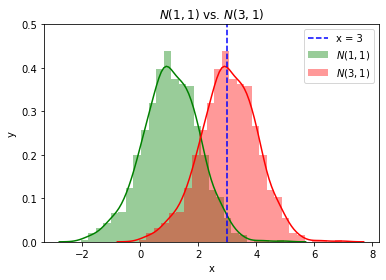

In [38]:
# visualize two normal distribtion
from scipy.stats import norm
r1 = norm.rvs(loc=1, scale=1, size=1000, random_state=1) # N(1, 1) u0
r2 = norm.rvs(loc=3, scale=1, size=1000, random_state=1)
sns.distplot(r1, color='g', label='$N(1, 1)$')
sns.distplot(r2, color='r', label='$N(3, 1)$')
x1 = [3, 3]
x2 = [0, 0.5]
plt.ylim(0, 0.5)
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x1, x2,'--b', label='x = 3')
plt.legend()
plt.title("$N(1,1)$ vs. $N(3,1)$")
plt.show()

### Direct Monte Carlo

In [39]:
# get tail probability by MC
MC = norm.rvs(loc=1, scale=1, size=100, random_state=1)
MC 

array([ 2.62434536,  0.38824359,  0.47182825, -0.07296862,  1.86540763,
       -1.3015387 ,  2.74481176,  0.2387931 ,  1.3190391 ,  0.75062962,
        2.46210794, -1.06014071,  0.6775828 ,  0.61594565,  2.13376944,
       -0.09989127,  0.82757179,  0.12214158,  1.04221375,  1.58281521,
       -0.10061918,  2.14472371,  1.90159072,  1.50249434,  1.90085595,
        0.31627214,  0.87710977,  0.06423057,  0.73211192,  1.53035547,
        0.30833925,  0.60324647,  0.3128273 ,  0.15479436,  0.32875387,
        0.9873354 , -0.11731035,  1.2344157 ,  2.65980218,  1.74204416,
        0.80816445,  0.11237104,  0.25284171,  2.6924546 ,  1.05080775,
        0.36300435,  1.19091548,  3.10025514,  1.12015895,  1.61720311,
        1.30017032,  0.64775015, -0.1425182 ,  0.65065728,  0.79110577,
        1.58662319,  1.83898341,  1.93110208,  1.28558733,  1.88514116,
        0.24560206,  2.25286816,  1.51292982,  0.70190716,  1.48851815,
        0.92442829,  2.13162939,  2.51981682,  3.18557541, -0.39

In [40]:
print("Tail Probability via MC: P(X > 3) = ", (MC>3).sum()/len(MC))

Tail Probability via MC: P(X > 3) =  0.02


In [41]:
# Monte Carlo Integration randomly choose 100 samples and do it 500 times
# find number of draws that is greater than 3
MC_means = np.zeros(500)
for i in range(500):
    MC = norm.rvs(loc=1, scale=1, size=100, random_state=i+50)
    MC_means[i] = (MC>3).sum()/len(MC)

In [42]:
MC_means[:5]

array([0.03, 0.03, 0.02, 0.02, 0.02])

### Important Sampling

There are two distributions. One is $h(x) = N(u_{0}, 1)$. The other is $g(x) = N(u_{1}, 1)$. The importance ration is equivalent to likelihood ratio. That is, $\frac{h(x)}{g(x)} = \frac{1}{\sqrt{2\pi \times 1}}exp(\frac{-(x - u_{0})^2}{2})/ \frac{1}{\sqrt{2\pi \times 1}}exp(\frac{-(x - u_{1})^2}{2}) = exp(\frac{1}{2}[2x(u_{0}-u_{1}) + (u_{1}^2-u_{0}^2)])$ 

In [43]:
def importantRatio(x):
    return np.exp(1/2 * (2 * x * (1 - 3) + (9 - 1)))

In [44]:
# draw samples from g(x) ~ Normal(3, 1)
MC_3 = norm.rvs(loc=3, scale=1, size=100, random_state=900)
total = 0
for i in MC_3:
    if i > 3:
        total += importantRatio(i)
print("Tail Probability via Importantant Sampling: P(X > 3) = ", total/len(MC_3))

Tail Probability via Importantant Sampling: P(X > 3) =  0.01642232598629436


In [45]:
# Important Sampling randomly choose 100 samples and do it 500 times
# find number of draws that is greater than 3
IS_means = np.zeros(500)
for i in range(500):
    MC_3 = norm.rvs(loc=3, scale=1, size=100, random_state=i)
    total = 0
    for j in MC_3:
        if j > 3:
            total += importantRatio(j)
    IS_means[i] = float(total/len(MC_3))

### Compare Variance of $\hat{I_{1}}$ and $\hat{I_{2}}$.

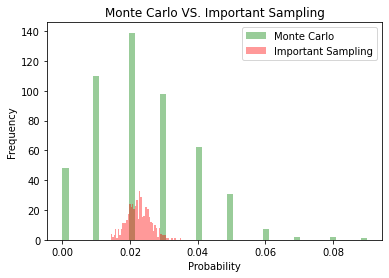

Variance of Monte Carlo: 0.00023097760000000004
Variance of Important Sampling: 0.00001160537475249343


In [46]:
sns.distplot(MC_means, bins=50, kde=False, color='g', label="Monte Carlo")
sns.distplot(IS_means, bins=50, kde=False, color='r', label="Important Sampling")
plt.legend()
plt.xlabel("Probability")
plt.ylabel("Frequency")
plt.title("Monte Carlo VS. Important Sampling")
plt.show()
print("Variance of Monte Carlo:", np.var(MC_means))
print("Variance of Important Sampling: {:.20f}".format(np.var(IS_means)))

From the above image, rare event probability is easily chosen via importance sampling. And, its variance is lower than MC method.

# Problem 4 Bayesian inference using Metropolis-Hastings algorithm

Implement the Metropolis algorithm. Parameter for binomial distribution is probability of success $θ ∈ [0, 1], n = 20$. Assume the observed data vector gives $S_{n} = 5$

## (a) & (b)
(a)
Assume the prior distribution as in our lecture, $π(θ) = 2 cos^2(4πθ)$. 
Generate samples from the posterior distribution $π(θ|Y)$. Discretize $θ$ to be a uniform grid of points $[0, 1/10, . . . , 1]$.

Run the chain for $n$ = 100, 500, 1000, and 5000 time steps, respectively. 

For each time step, compare the empirical distributions with the desired posterior distribution $π(θ|Y )$. 

(Hint: you may use ergodicity: hence the distribution of states can be estimated from one sample path when the number of time steps is large (e.g. 500).)

(b)  
Following from the previous question, evaluate the mean of the posterior distribution (this gives an estimator for the parameter value), and $E^{π(θ|Y)}([θ − 1/2]^{2}) = \int (θ − 1/2)^2 π(θ|Y )dθ.$

For (b), that is, $$E^{π(θ|Y)}([θ − 1/2]^{2}) = Var(θ - 1/2) + E(θ - 1/2)^{2} $$

In [47]:
import math

def prior(theta):
    return 2 * np.cos(4 * math.pi * theta)

def posterior(theta, sn, n):
    """
    theta: number that is in [0, 1]
    sn: Binomail distribution Bin(n, theta)
    n: number of trials
    """
    return 2 * theta ** sn *(1 - theta) ** (n - sn) * (np.cos(4 * math.pi * theta) ** 2)

def proposal(theta, oldtheta):
    """
    sigma: assume it is 0.1
    """
    return np.exp(- (1 / 2 * 0.1 ** 2) * (theta - oldtheta) ** 2)

In [59]:
def MH_sampling(T, S, n):
    """
    T: time steps 
    S: Sn Binomial
    n: number of trials
    """
    theta_mesh = np.arange(0, 1.1, 0.1)
    
    #random initilization
    x = np.zeros(T)
    x[0] = theta_mesh[np.random.randint(len(theta_mesh))]
    
    # iterations random walk 
    for ii in range(T-1):
        # randomly pick one proposed probability (stage1)
        q = proposal(theta_mesh, x[ii])
        q = q / q.sum()
        q_sum = np.cumsum(q)
        
        # pick theta random
        rand = np.random.random_sample()
        difference = np.abs(q_sum-rand)
        ind = np.argmin(difference)
        theta_rand = theta_mesh[ind]
        # Rejection Step (stage2)
        coin = np.random.random_sample()
        p = posterior(theta_rand, S, n) / posterior(x[ii], S, n)
        p = np.amin([1, p])
        
        if coin < p:
            x[ii+1] = theta_rand
        else:
            x[ii+1] = x[ii]
    return x

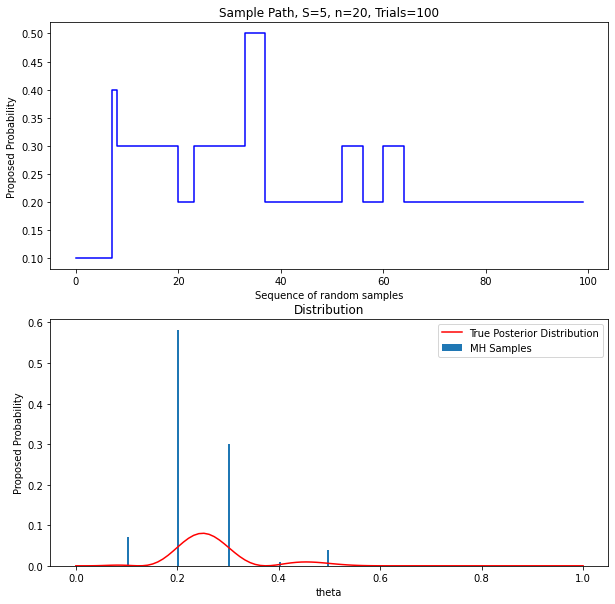

Mean of MH Samples:  0.23700000000000002
Mean of (θ − 1/2)^2 of MH Samples:  0.07549999999999998


In [72]:
from scipy import integrate
# Trials Starts
T = 100
n = 20
po = 5/20
S = 5

path = MH_sampling(T, S, n)

time = [i for i in range(T)]
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

sns.lineplot(time,path, drawstyle='steps-post', ax=ax1, color='b')
ax1.set_xlabel("Sequence of random samples")
ax1.set_ylabel("Proposed Probability")
ax1.set_title("Sample Path, S=5, n=20, Trials=100")

# compare the empirical distributions with the desired posterior distribution
theta_mesh = np.linspace(0.0, 1.0, num=100)
thry_theta = posterior(theta_mesh, S, n)
thry_theta = thry_theta / thry_theta.sum()

weights = np.ones_like(path)/float(len(path))
plt.hist(path,bins=100,density=False, weights=weights, label="MH Samples")
sns.lineplot(theta_mesh, thry_theta, color='r', ax=ax2, label='True Posterior Distribution')
ax2.set_xlabel("theta")
ax2.set_ylabel("Proposed Probability")
ax2.set_title("Distribution")
plt.legend()
plt.show()


## mean and (theata - 0.5) ^ 2 average
mean_MH = path.mean()
theata_half = (path - 0.5).var() + (path - 0.5).mean() ** 2

print("Mean of MH Samples: ", mean_MH)
print("Mean of (\u03B8 − 1/2)^2 of MH Samples: ", theata_half)

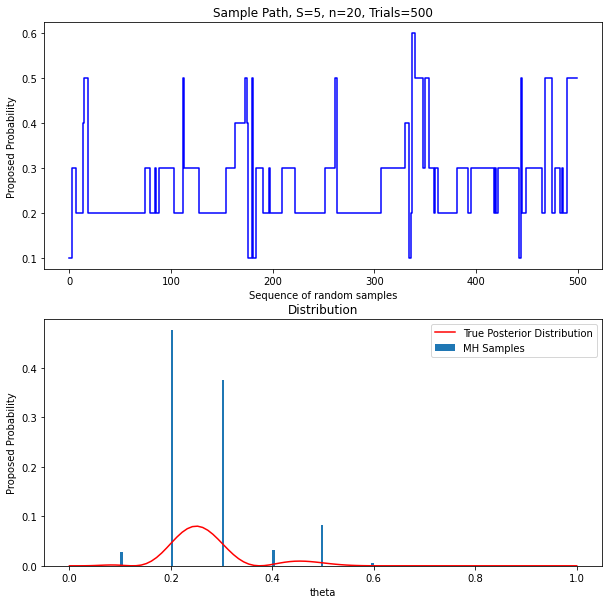

Mean of MH Samples:  0.26820000000000005
Mean of (θ − 1/2)^2 of MH Samples:  0.06273999999999999


In [73]:
# Trials Starts
T = 500
n = 20
po = 5/20
S = 5

path = MH_sampling(T, S, n)

time = [i for i in range(T)]
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

sns.lineplot(time,path, drawstyle='steps-post', ax=ax1, color='b')
ax1.set_xlabel("Sequence of random samples")
ax1.set_ylabel("Proposed Probability")
ax1.set_title("Sample Path, S=5, n=20, Trials=500")

# compare the empirical distributions with the desired posterior distribution
theta_mesh = np.linspace(0.0, 1.0, num=100)
thry_theta = posterior(theta_mesh, S, n)
thry_theta = thry_theta / thry_theta.sum()
weights = np.ones_like(path)/float(len(path))
plt.hist(path,bins=100,density=False, weights=weights, label="MH Samples")
sns.lineplot(theta_mesh, thry_theta, color='r', ax=ax2, label='True Posterior Distribution')
ax2.set_xlabel("theta")
ax2.set_ylabel("Proposed Probability")
ax2.set_title("Distribution")
plt.legend()
plt.show()


## mean and (theata - 0.5) ^ 2 average
mean_MH = path.mean()
theata_half = (path - 0.5).var() + (path - 0.5).mean() ** 2

print("Mean of MH Samples: ", mean_MH)
print("Mean of (\u03B8 − 1/2)^2 of MH Samples: ", theata_half)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in double_scalars


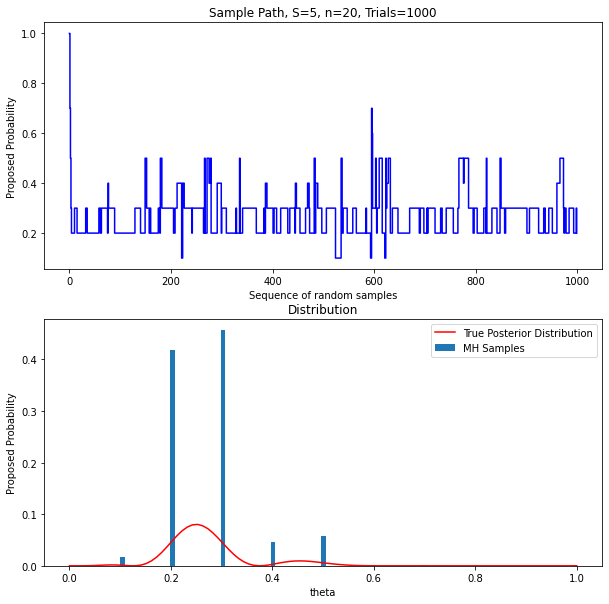

Mean of MH Samples:  0.27270000000000005
Mean of (θ − 1/2)^2 of MH Samples:  0.05947


In [74]:
# Trials Starts
T = 1000
n = 20
po = 5/20
S = 5

path = MH_sampling(T, S, n)

time = [i for i in range(T)]
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

sns.lineplot(time,path, drawstyle='steps-post', ax=ax1, color='b')
ax1.set_xlabel("Sequence of random samples")
ax1.set_ylabel("Proposed Probability")
ax1.set_title("Sample Path, S=5, n=20, Trials=1000")

# compare the empirical distributions with the desired posterior distribution
theta_mesh = np.linspace(0.0, 1.0, num=100)
thry_theta = posterior(theta_mesh, S, n)
thry_theta = thry_theta / thry_theta.sum()
weights = np.ones_like(path)/float(len(path))
plt.hist(path,bins=100,density=False, weights=weights, label="MH Samples")
sns.lineplot(theta_mesh, thry_theta, color='r', ax=ax2, label='True Posterior Distribution')
ax2.set_xlabel("theta")
ax2.set_ylabel("Proposed Probability")
ax2.set_title("Distribution")
plt.legend()
plt.show()


## mean and (theata - 0.5) ^ 2 average
mean_MH = path.mean()
theata_half = (path - 0.5).var() + (path - 0.5).mean() ** 2

print("Mean of MH Samples: ", mean_MH)
print("Mean of (\u03B8 − 1/2)^2 of MH Samples: ", theata_half)

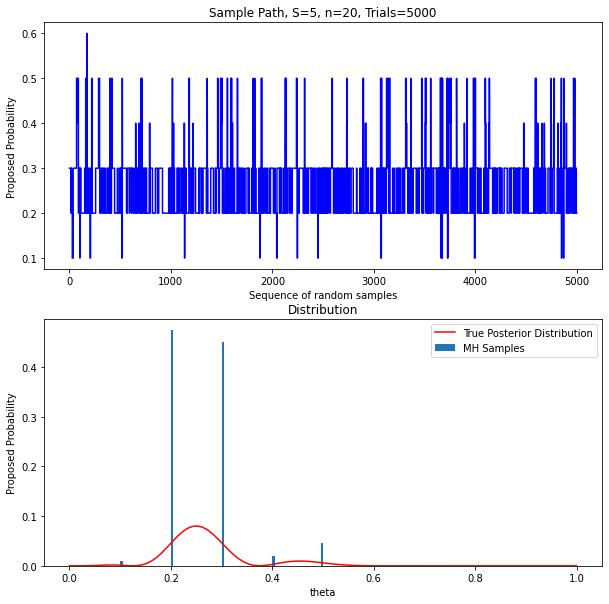

Mean of MH Samples:  0.26196
Mean of (θ − 1/2)^2 of MH Samples:  0.062435999999999985


In [75]:
# Trials Starts
T = 5000
n = 20
po = 5/20
S = 5

path = MH_sampling(T, S, n)

time = [i for i in range(T)]
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

sns.lineplot(time,path, drawstyle='steps-post', ax=ax1, color='b')
ax1.set_xlabel("Sequence of random samples")
ax1.set_ylabel("Proposed Probability")
ax1.set_title("Sample Path, S=5, n=20, Trials=5000")

# compare the empirical distributions with the desired posterior distribution
theta_mesh = np.linspace(0.0, 1.0, num=100)
thry_theta = posterior(theta_mesh, S, n)
thry_theta = thry_theta / thry_theta.sum()
weights = np.ones_like(path)/float(len(path))
plt.hist(path,bins=100,density=False, weights=weights, label="MH Samples")
sns.lineplot(theta_mesh, thry_theta, color='r', ax=ax2, label='True Posterior Distribution')
ax2.set_xlabel("theta")
ax2.set_ylabel("Proposed Probability")
ax2.set_title("Distribution")
plt.legend()
plt.show()

## mean and (theata - 0.5) ^ 2 average
mean_MH = path.mean()
theata_half = (path - 0.5).var() + (path - 0.5).mean() ** 2

print("Mean of MH Samples: ", mean_MH)
print("Mean of (\u03B8 − 1/2)^2 of MH Samples: ", theata_half)

Using discrete interval of uniform [0, 1], we could see its distribution is not suitable to describe its distribtuion correctly. There are some values, concetrating on 0.2 and 0.3.
As for mean, those are really close to 5/20 (0.25). And, for (θ − 1/2)^2, with more timesteps, values seems to be smaller. The reason is that it will consider the variance of random samples and depend on mean of random samples each time. But, it really depends on mean of random samples every time we randomly sample.

## (c)
Now assume the the prior distribution is given by $π(θ)$ is a uniform distribution over $[0, 1]$. Repeat the above questions, (a) and (b).

In [64]:
def MH_sampling_Uniform(T, S, n):
    """
    T: time steps 
    S: Sn Binomial
    n: number of trials
    """
    theta_mesh = np.random.uniform(0,1, 100)
    #random initilization
    x = np.zeros(T)
    x[0] = np.random.uniform(0,1)
    
    # iterations random walk 
    for ii in range(T-1):
        # randomly pick one proposed probability
        q = proposal(theta_mesh, x[ii])
        q = q / q.sum()
        q_sum = np.cumsum(q)
        
        # pick theta random
        rand = np.random.random_sample()
        difference = np.abs(q_sum-rand)
        ind = np.argmin(difference)
        theta_rand = theta_mesh[ind]

        # Rejection Step
        coin = np.random.random_sample()
        p = posterior(theta_rand, S, n) / posterior(x[ii], S, n)
        p = np.amin([1, p])
        
        if coin < p:
            x[ii+1] = theta_rand
        else:
            x[ii+1] = x[ii]
    return x

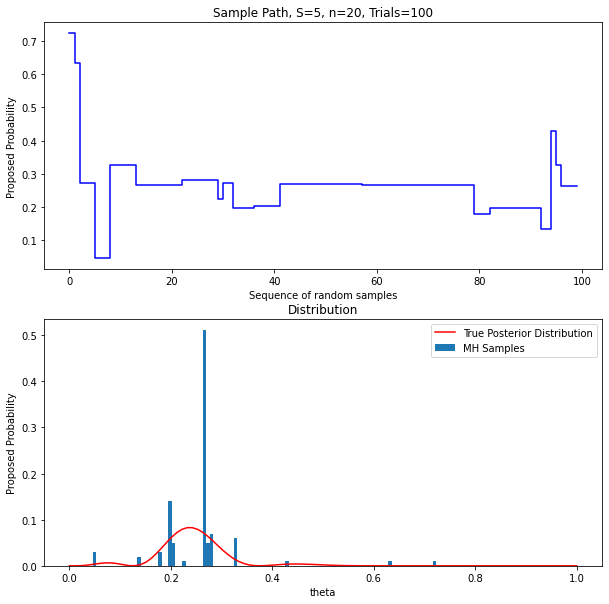

Mean of MH Samples:  0.25679991299636035
Mean of (θ − 1/2)^2 of MH Samples:  0.06586386867729314


In [65]:
# Trials Starts
T = 100
n = 20
po = 5/20
S = np.random.binomial(n, po)

path = MH_sampling_Uniform(T, S, n)

time = [i for i in range(T)]
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

sns.lineplot(time,path, drawstyle='steps-post', ax=ax1, color='b')
ax1.set_xlabel("Sequence of random samples")
ax1.set_ylabel("Proposed Probability")
ax1.set_title("Sample Path, S=5, n=20, Trials=100")

# compare the empirical distributions with the desired posterior distribution
theta_mesh = np.linspace(0.0, 1.0, num=100)
#theta_mesh = np.arange(0, 1, 0.01)
thry_theta = posterior(theta_mesh, S, n)
thry_theta = thry_theta / thry_theta.sum()
weights = np.ones_like(path)/float(len(path))
plt.hist(path,bins=100,density=False, weights=weights, label="MH Samples")
sns.lineplot(theta_mesh, thry_theta, color='r', ax=ax2, label='True Posterior Distribution')
ax2.set_xlabel("theta")
ax2.set_ylabel("Proposed Probability")
ax2.set_title("Distribution")
plt.legend()
plt.show()

## mean and (theata - 0.5) ^ 2 average
mean_MH = path.mean()
theata_half = (path - 0.5).var() + (path - 0.5).mean() ** 2

print("Mean of MH Samples: ", mean_MH)
print("Mean of (\u03B8 − 1/2)^2 of MH Samples: ", theata_half)

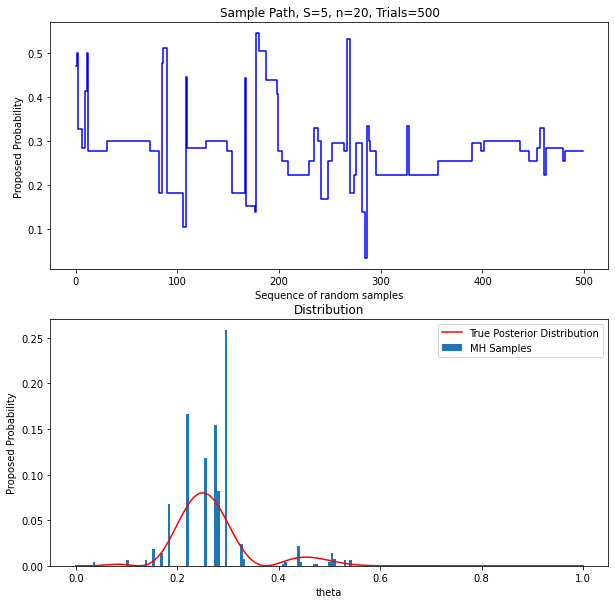

Mean of MH Samples:  0.27428112074053795
Mean of (θ − 1/2)^2 of MH Samples:  0.05641587873963623


In [66]:
# Trials Starts
T = 500
n = 20
po = 5/20
S = 5

path = MH_sampling_Uniform(T, S, n)

time = [i for i in range(T)]
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

sns.lineplot(time,path, drawstyle='steps-post', ax=ax1, color='b')
ax1.set_xlabel("Sequence of random samples")
ax1.set_ylabel("Proposed Probability")
ax1.set_title("Sample Path, S=5, n=20, Trials=500")

# compare the empirical distributions with the desired posterior distribution
#theta_mesh = np.random.uniform(0,1,100)
theta_mesh = np.linspace(0.0, 1.0, num=100)
thry_theta = posterior(theta_mesh, S, n)
thry_theta = thry_theta / thry_theta.sum()
weights = np.ones_like(path)/float(len(path))
plt.hist(path,bins=100,density=False, weights=weights, label="MH Samples")
sns.lineplot(theta_mesh, thry_theta, color='r', ax=ax2, label='True Posterior Distribution')
ax2.set_xlabel("theta")
ax2.set_ylabel("Proposed Probability")
ax2.set_title("Distribution")
plt.legend()
plt.show()

## mean and (theata - 0.5) ^ 2 average
mean_MH = path.mean()
theata_half = (path - 0.5).var() + (path - 0.5).mean() ** 2

print("Mean of MH Samples: ", mean_MH)
print("Mean of (\u03B8 − 1/2)^2 of MH Samples: ", theata_half)

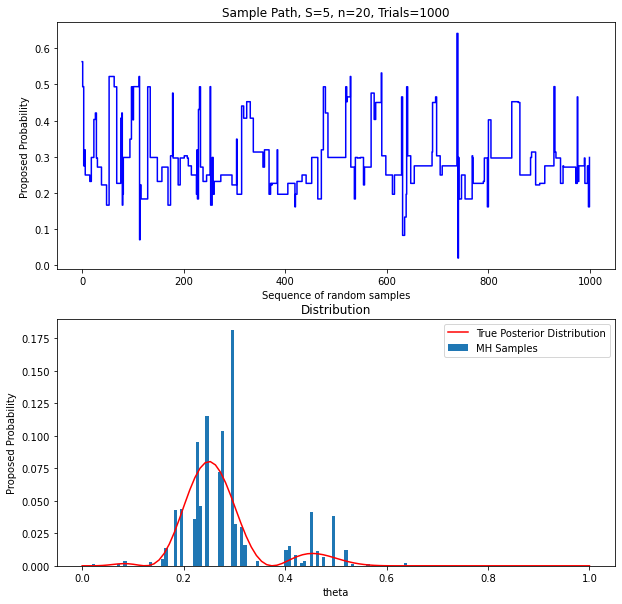

Mean of MH Samples:  0.28777739800838925
Mean of (θ − 1/2)^2 of MH Samples:  0.05247051744426754


In [67]:
# Trials Starts
T = 1000
n = 20
po = 5/20
S = 5

path = MH_sampling_Uniform(T, S, n)

time = [i for i in range(T)]
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

sns.lineplot(time,path, drawstyle='steps-post', ax=ax1, color='b')
ax1.set_xlabel("Sequence of random samples")
ax1.set_ylabel("Proposed Probability")
ax1.set_title("Sample Path, S=5, n=20, Trials=1000")

# compare the empirical distributions with the desired posterior distribution
#theta_mesh = np.random.uniform(0,1,100)
theta_mesh = np.linspace(0.0, 1.0, num=100)
thry_theta = posterior(theta_mesh, S, n)
thry_theta = thry_theta / thry_theta.sum()
weights = np.ones_like(path)/float(len(path))
plt.hist(path,bins=100,density=False, weights=weights, label="MH Samples")
sns.lineplot(theta_mesh, thry_theta, color='r', ax=ax2, label='True Posterior Distribution')
ax2.set_xlabel("theta")
ax2.set_ylabel("Proposed Probability")
ax2.set_title("Distribution")
plt.legend()
plt.show()

## mean and (theata - 0.5) ^ 2 average
mean_MH = path.mean()
theata_half = (path - 0.5).var() + (path - 0.5).mean() ** 2

print("Mean of MH Samples: ", mean_MH)
print("Mean of (\u03B8 − 1/2)^2 of MH Samples: ", theata_half)

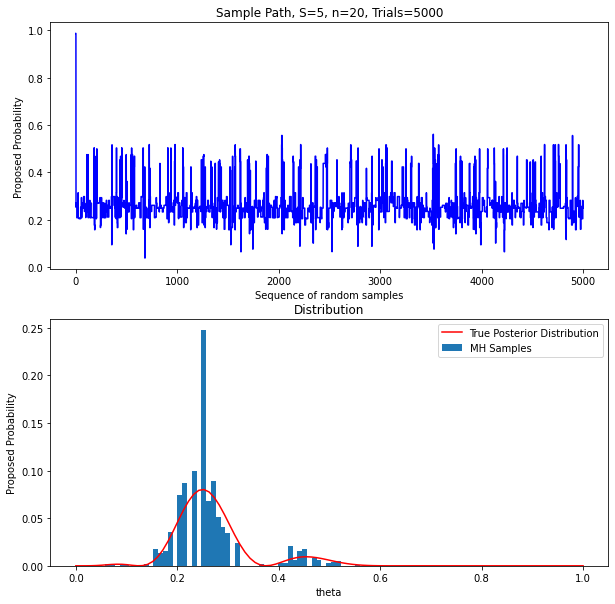

Mean of MH Samples:  0.2640069766381168
Mean of (θ − 1/2)^2 of MH Samples:  0.06086751908209616


In [68]:
# Trials Starts
T = 5000
n = 20
po = 5/20
S = 5 #np.random.binomial(n, po)

path = MH_sampling_Uniform(T, S, n)

time = [i for i in range(T)]
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

sns.lineplot(time,path, drawstyle='steps-post', ax=ax1, color='b')
ax1.set_xlabel("Sequence of random samples")
ax1.set_ylabel("Proposed Probability")
ax1.set_title("Sample Path, S=5, n=20, Trials=5000")

# compare the empirical distributions with the desired posterior distribution
#theta_mesh = np.random.uniform(0,1,500)
#theta_mesh = np.linspace(0.0, 1.0, num=100)
theta_mesh = np.linspace(0.0, 1.0, 100)
thry_theta = posterior(theta_mesh, S, n)
thry_theta = thry_theta / thry_theta.sum()
weights = np.ones_like(path)/float(len(path))
plt.hist(path,bins=100,density=False, weights=weights, label="MH Samples")
sns.lineplot(theta_mesh, thry_theta, color='r', ax=ax2, label='True Posterior Distribution')
ax2.set_xlabel("theta")
ax2.set_ylabel("Proposed Probability")
ax2.set_title("Distribution")
plt.legend()
plt.show()

## mean and (theata - 0.5) ^ 2 average
mean_MH = path.mean()
theata_half = (path - 0.5).var() + (path - 0.5).mean() ** 2

print("Mean of MH Samples: ", mean_MH)
print("Mean of (\u03B8 − 1/2)^2 of MH Samples: ", theata_half)

For means of random samples and (θ − 1/2)^2, the former value are really closer to 0.25. And the latter have no too much difference among different time steps. But, if there is fewer timesteps, the value seems to be higher than more time steps in that it will consider Var((θ − 1/2)) which will include numbers of random samples given that E((θ − 1/2))^2 are really close among different time steps.

Compared to discrete intervals, this time uniform distribution is used and we could see these samples could nearly match true posterior distribution if we select good proposal distribution and random numbers. Although those samples still have some clear gap, it is still an option to characterize posterior distribution.